# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1- Mohamed Ahmed Abdelhamid 46-16738
  
2- Marwan Khalid Farag      46-14780


### Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### 1- Read the data

In [17]:
df = pd.read_csv('AirQualityUCI.csv', na_values=[-200], parse_dates=['Date'])
print('The data set has {} rows'.format(df.shape[0]))
df.head()

The data set has 9357 rows


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [18]:
df.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis='columns', inplace=True)
df.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 3- Handle missing data

In [19]:
def percentage_of_missing(df):
    missing_column = df.columns[df.isna().any()]
    percentage = df[missing_column].isna().mean().sort_values(ascending=False) * 100
    return percentage

In [20]:
percentage = percentage_of_missing(df)
print(percentage)

NO2(GT)          17.54836
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64


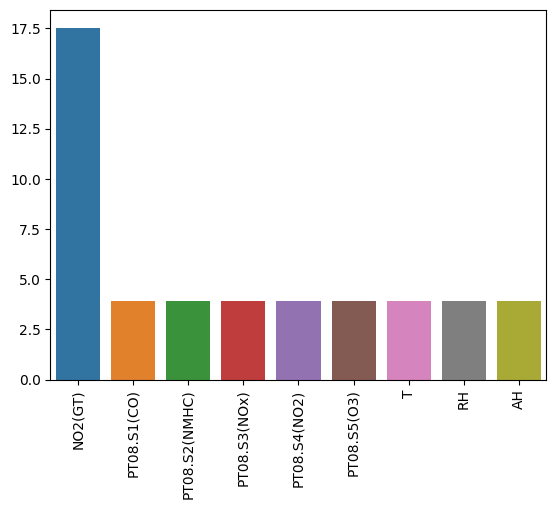

In [21]:
sns.barplot(x=percentage.index, y=percentage)
plt.xticks(rotation=90)
plt.show()

### Dropping missing values in the target column.

In [22]:
df = df[~df['NO2(GT)'].isna()]

In [23]:
percentage_of_missing(df)

PT08.S1(CO)      4.173688
PT08.S2(NMHC)    4.173688
PT08.S3(NOx)     4.173688
PT08.S4(NO2)     4.173688
PT08.S5(O3)      4.173688
T                4.173688
RH               4.173688
AH               4.173688
dtype: float64

<Figure size 1500x500 with 0 Axes>

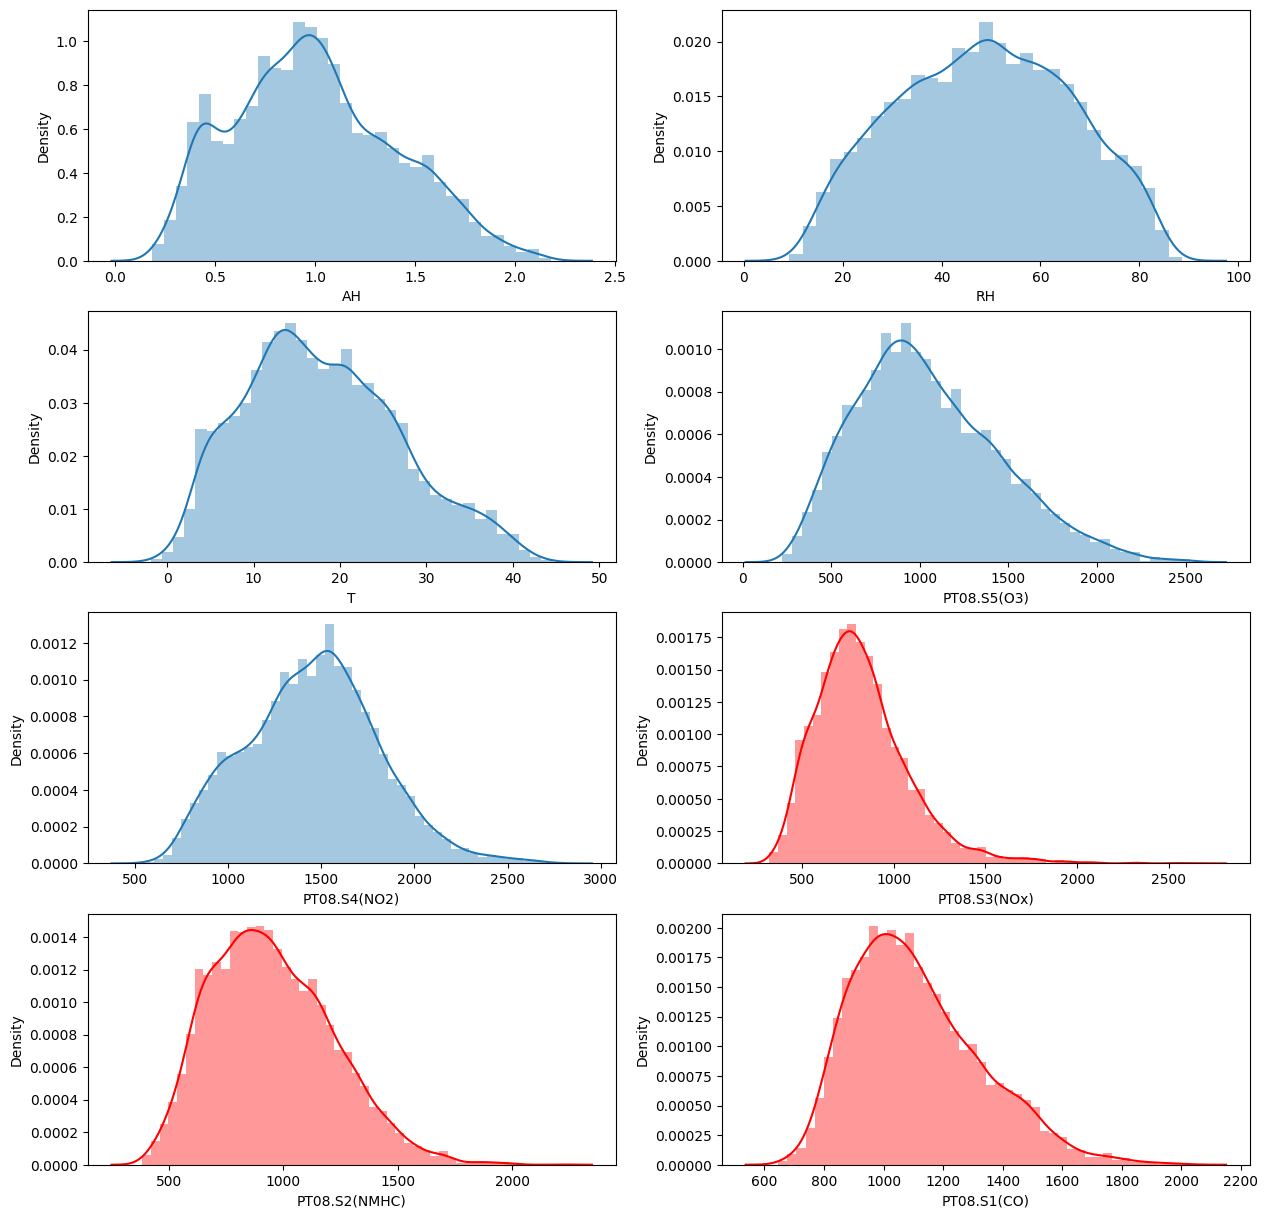

In [24]:
plt.figure(figsize=(15,5))
fig, ax = plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.distplot(df['AH'], ax=ax[0][0])
sns.distplot(df['RH'], ax=ax[0][1])
sns.distplot(df['T'], ax=ax[1][0])
sns.distplot(df['PT08.S5(O3)'], ax=ax[1][1])

sns.distplot(df['PT08.S4(NO2)'], ax=ax[2][0])
sns.distplot(df['PT08.S3(NOx)'], ax=ax[2][1], color='r')
sns.distplot(df['PT08.S2(NMHC)'], ax=ax[3][0], color='r')
sns.distplot(df['PT08.S1(CO)'], ax=ax[3][1], color='r')
plt.show()

### From the previous graphs we can notice that the all distributions are normal except PT08.S3(NOx), PT08.S2(NMHC) and PT08.S1(CO).
### Based on this we will impute the missing values for all columns with the mean and we will use the median for these three columns.

In [25]:
df['PT08.S3(NOx)'] = df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].median())
df['PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].median())
df['PT08.S1(CO)'] = df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].median())

df['AH'] = df['AH'].fillna(df['AH'].mean())
df['RH'] = df['RH'].fillna(df['RH'].mean())
df['T'] = df['T'].fillna(df['T'].mean())
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].mean())
df['PT08.S5(O3)'] = df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].mean())

df.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### 4- Replace date feature

In [26]:
df['DateTime'] = df['Date'].astype(str) + 'T' + df['Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True) 

In [27]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day

### 5- Replace time feature

In [28]:
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['seconds'] = df['DateTime'].dt.second

df.drop(['Date', 'Time', 'DateTime'], axis='columns', inplace=True)

In [29]:
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,hour,minute,seconds
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,18,0,0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,19,0,0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,20,0,0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,21,0,0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,22,0,0


### 6- Apply feature scaling

In [30]:
X = df.drop(['NO2(GT)'], axis='columns')
y = df['NO2(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scalar = StandardScaler()
# The scaling part will be done in the loop for every degree.

## Let's define some functions that will help us

In [31]:
def evaluate_model(model_type):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    train_rmse_errors = []
    test_rmse_errors = []
    train_abs_errors = []
    test_abs_errors = []
    models = []
    for i in range(1, 5):
        converter = PolynomialFeatures(degree=i)

        X_train_var = converter.fit_transform(X_train)
        X_test_var = converter.fit_transform(X_test)
        
        scalar.fit(X_train_var)
        X_train_var = scalar.transform(X_train_var)
        X_test_var = scalar.transform(X_test_var)

        if model_type == 'lasso':
            model = LassoCV(eps=0.1,n_alphas=10,cv=5)

        elif model_type == 'ridge':
            model = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
            
        else:
            model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

        model.fit(X_train_var, y_train)
        
        y_hat_test = model.predict(X_test_var)
        y_hat_train = model.predict(X_train_var)

        train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, y_hat_train)))
        test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, y_hat_test)))

        train_abs_errors.append(mean_absolute_error(y_train, y_hat_train))
        test_abs_errors.append(mean_absolute_error(y_test, y_hat_test))
        models.append(model)
    return train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models

def plot_errors(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors):
    plt.plot(range(1,5),train_rmse_errors,label='RMSE Train')
    plt.plot(range(1,5),test_rmse_errors,label='RMSE Test')
    plt.plot(range(1,5),train_abs_errors,label='ABS Train')
    plt.plot(range(1,5),test_abs_errors,label='ABS Test')
    plt.xlabel("Polynomial Complexity")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

def print_results(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models):
    test_rmse_errors = np.array(test_rmse_errors)
    min_index = np.where(test_rmse_errors == test_rmse_errors.min())[0][0]
    min_error = test_rmse_errors.min()
    best_model = models[min_index]
    print('Best model is of degree {}'.format(min_index+1))
    print('RMSE Test of best model: {:.2f}'.format(test_rmse_errors[min_index]))
    print('RMSE Train of best model: {:.2f}'.format(train_rmse_errors[min_index]))
    print('ABS Test of best model: {:.2f}'.format(test_abs_errors[min_index]))
    print('ABS Train of best model: {:.2f}'.format(train_abs_errors[min_index]))
    print('-------------------')
    print('Best model coefficients are: ')
    print(best_model.coef_)
    print('-------------------')
    print('The model chose the following alpha: ')
    print(best_model.alpha_)
    return test_rmse_errors[min_index], best_model, min_index+1

### 7- Evaluate different degrees of lasso CV polynomial regression

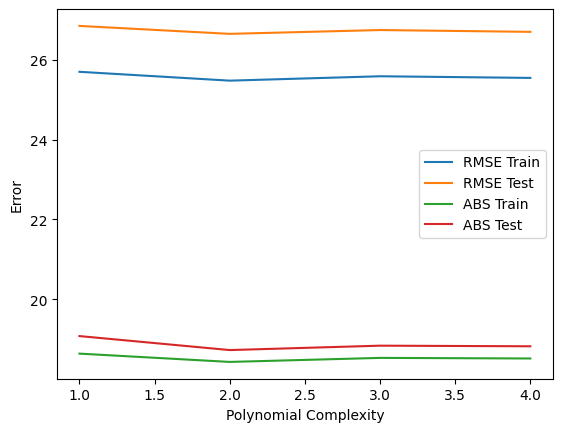

In [32]:
train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models = evaluate_model('lasso')
plot_errors(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors)

### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [33]:
lasso_error, best_lasso, lasso_degree = print_results(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models)

Best model is of degree 2
RMSE Test of best model: 26.65
RMSE Train of best model: 25.47
ABS Test of best model: 18.72
ABS Train of best model: 18.43
-------------------
Best model coefficients are: 
[ 0.          0.          4.26559945 -7.88263395 -0.          8.83190026
 -0.         -0.         -0.          5.85265709 -0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  3.13607742  0.          0.          0.          0.          0.
 -0.         -0.          0.         -0.         -0.         -5.73662171
 -0.         -0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.          1.69733901  0.          0.
  7.

### 9a- Evaluate different degrees of Ridge CV polynomial regression

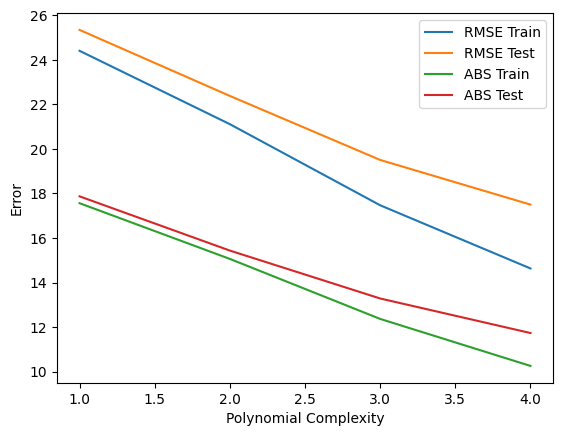

In [34]:
train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models = evaluate_model('ridge')
plot_errors(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors)

### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [35]:
ridge_error, best_ridge, ridge_degree = print_results(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models)

Best model is of degree 4
RMSE Test of best model: 17.50
RMSE Train of best model: 14.63
ABS Test of best model: 11.73
ABS Train of best model: 10.25
-------------------
Best model coefficients are: 
[ 0.         26.91635171 16.52560588 ...  0.          0.
  0.        ]
-------------------
The model chose the following alpha: 
0.01


### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

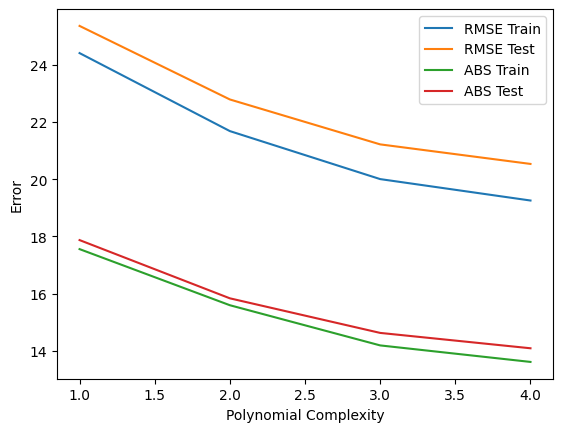

In [36]:
train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models = evaluate_model('elastic')
plot_errors(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors)

### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [37]:
elastic_error, best_elastic, elastic_degree = print_results(train_rmse_errors, test_rmse_errors, train_abs_errors, test_abs_errors, models)

Best model is of degree 4
RMSE Test of best model: 20.53
RMSE Train of best model: 19.25
ABS Test of best model: 14.09
ABS Train of best model: 13.61
-------------------
Best model coefficients are: 
[ 0.          8.67371761 15.46349348 ...  0.          0.
  0.        ]
-------------------
The model chose the following alpha: 
0.03412170056048742


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [38]:
from joblib import load, dump
if lasso_error == min(lasso_error, ridge_error, elastic_error):
    model = best_lasso
    degree = lasso_degree
elif ridge_error == min(ridge_error, elastic_error):
    model = best_ridge
    degree = ridge_degree
else:
    model = best_elastic
    degree = elastic_degree
dump(model, 'best_model.joblib')


['best_model.joblib']

### 12- Load the best model and test it on a sample that you manually created it.

In [39]:
model = load('best_model.joblib')
example = [[880.0,704.0,913.0,1529.0,700.0,23.8,58.3,1.608,2004.0,8,22,10,0.0,0.0]]
x = PolynomialFeatures(degree=degree).fit_transform(X_train)
example = PolynomialFeatures(degree=degree).fit_transform(example)
scalar.fit(x)
example = scalar.transform(example)
model.predict(example)

array([74.31716573])

## Great work!
----